In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

sns.set()

In [62]:
df=pd.read_csv('1.03.+Dummies.csv')
df

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [63]:
new_df=df.copy()
new_df['Attendance']=df['Attendance'].map({'Yes':0,'No':1})
new_df

,SAT,GPA,Attendance
0,1714,2.40,1
1,1664,2.52,1
2,1760,2.54,1
3,1685,2.74,1
4,1693,2.83,1
...,...,...,...
79,1936,3.71,0
80,1810,3.71,0
81,1987,3.73,1
82,1962,3.76,0


In [64]:
new_df.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.535714
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,1.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [65]:
x1=new_df[['SAT','Attendance']]
y=new_df['GPA']

In [66]:
x=sm.add_constant(x1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           2.19e-15
Time:                        19:35:33   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8665      0.368      2.354      0.021       0.134       1.599
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance    -0.2226      0.041     -5.451      0.000      -0.304      -0.141
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

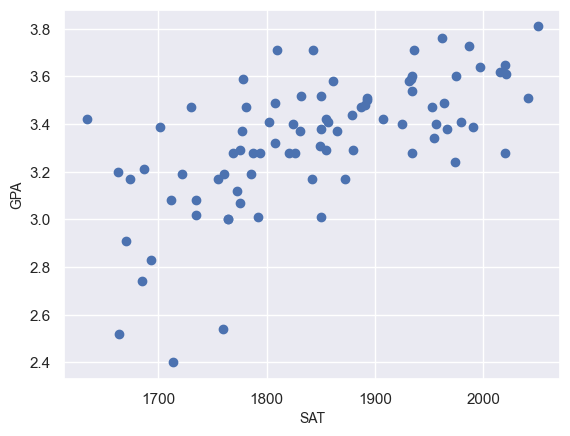

In [67]:
plt.scatter(new_df['SAT'],y)
plt.xlabel('SAT',fontsize=10)
plt.ylabel('GPA',fontsize=10)
plt.show()

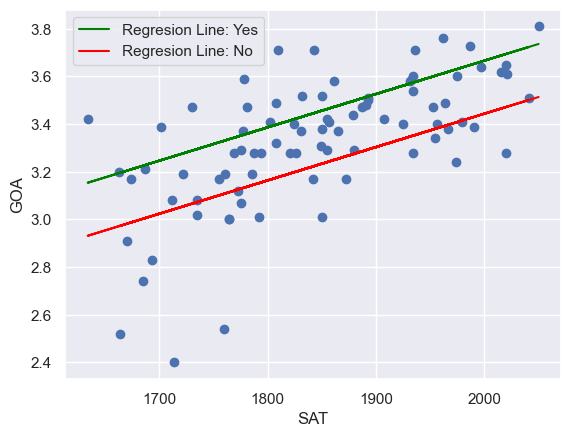

In [68]:
plt.scatter(new_df['SAT'],y)
yhat_yes=0.8665+0.0014*new_df['SAT']-0.2226	*0
yhat_no=0.8665+0.0014*new_df['SAT']-0.2226	*1
plt.plot(new_df['SAT'],yhat_yes,color='green',label='Regresion Line: Yes')
plt.plot(new_df['SAT'],yhat_no,color='red',label='Regresion Line: No')
plt.xlabel('SAT',fontsize=12)
plt.ylabel('GOA',fontsize=12)
plt.legend()
plt.show()

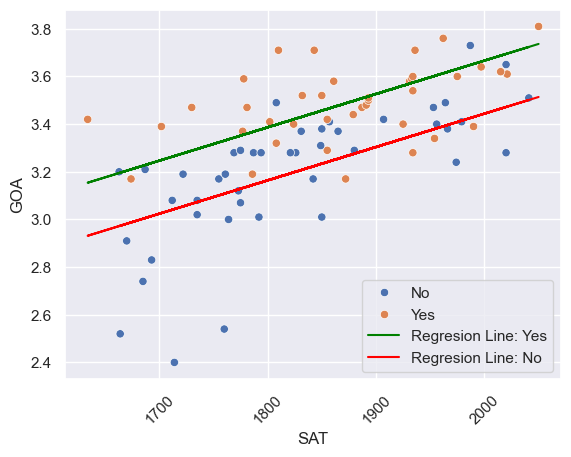

In [85]:
sns.scatterplot(data=df,x='SAT',y='GPA',hue='Attendance')
yhat_yes=0.8665+0.0014*new_df['SAT']-0.2226	*0
yhat_no=0.8665+0.0014*new_df['SAT']-0.2226	*1
plt.plot(new_df['SAT'],yhat_yes,color='green',label='Regresion Line: Yes')
plt.plot(new_df['SAT'],yhat_no,color='red',label='Regresion Line: No')
plt.xlabel('SAT',fontsize=12)
plt.ylabel('GOA',fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [70]:
x_matrix=df['SAT'].values.reshape(-1,1)
x_matrix

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

In [71]:
reg=LinearRegression()
reg.fit(x_matrix,y)

LinearRegression()

In [72]:
reg.intercept_

0.27504029966028076

In [73]:
reg.coef_

array([0.00165569])

In [74]:
reg.predict([[1740]])

array([3.15593751])

In [75]:
x

,const,SAT,Attendance
0,1.0,1714,1
1,1.0,1664,1
2,1.0,1760,1
3,1.0,1685,1
4,1.0,1693,1
...,...,...,...
79,1.0,1936,0
80,1.0,1810,0
81,1.0,1987,1
82,1.0,1962,0


In [76]:
new_data=pd.DataFrame({'const':1,'SAT':[1740,1680],'Attendance':[0,1]})
new_data

,const,SAT,Attendance
0,1,1740,0
1,1,1680,1


In [77]:
new_data.rename(index={0:'Bob',1:'Alice'})
new_data

,const,SAT,Attendance
0,1,1740,0
1,1,1680,1


In [79]:
prediction=model.predict(new_data)
prediction

0    3.302149
1    2.995517
dtype: float64

In [80]:
new_data['Prection GPA']=prediction

In [81]:
new_data

,const,SAT,Attendance,Prection GPA
0,1,1740,0,3.302149
1,1,1680,1,2.995517


In [82]:
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,Prection GPA
Bob,1,1740,0,3.302149
Alice,1,1680,1,2.995517


In [88]:
df=pd.read_csv('real_estate_price_size.csv')
df

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [89]:
x1=df['size']
y=df['price']

In [90]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           8.13e-31
Time:                        20:04:41   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
x_matrix=x1.values.reshape(-1,1)
x_matrix

array([[ 643.09],
       [ 656.22],
       [ 487.29],
       [1504.75],
       [1275.46],
       [ 575.19],
       [ 570.89],
       [ 620.82],
       [ 682.26],
       [ 694.52],
       [1060.36],
       [1842.51],
       [ 694.52],
       [1009.25],
       [1300.96],
       [1379.72],
       [ 690.54],
       [ 623.94],
       [ 681.07],
       [1027.76],
       [ 620.71],
       [ 549.69],
       [1207.45],
       [ 518.38],
       [ 525.81],
       [1103.3 ],
       [ 570.89],
       [1334.1 ],
       [ 681.07],
       [1496.36],
       [1010.33],
       [ 681.07],
       [ 597.9 ],
       [ 525.81],
       [ 857.54],
       [ 622.97],
       [ 823.21],
       [ 570.25],
       [ 685.48],
       [ 698.29],
       [1021.95],
       [ 682.26],
       [ 823.21],
       [1334.1 ],
       [1060.36],
       [ 698.29],
       [ 633.19],
       [ 698.29],
       [ 633.19],
       [ 617.05],
       [ 647.5 ],
       [1021.95],
       [1021.95],
       [ 727.88],
       [ 647.5 ],
       [15

In [92]:
reg=LinearRegression()
reg.fit(x_matrix,y)

LinearRegression()

In [93]:
reg.score(x_matrix,y)

0.7447391865847587

In [94]:
reg.intercept_

101912.60180122912

In [95]:
reg.coef_

array([223.17874259])

In [96]:
reg.predict([[1740]])

array([490243.61391585])

In [112]:
reg.predict([[1820]])

array([508097.91332341])

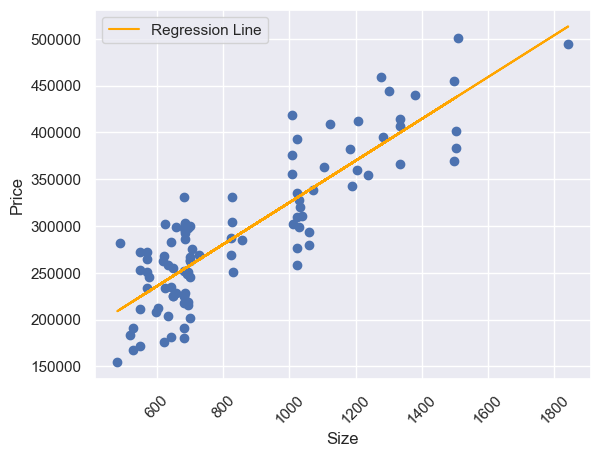

In [104]:
plt.scatter(x1,y)
yhat=reg.intercept_+reg.coef_*x_matrix
plt.plot(x_matrix,yhat,color='orange',label='Regression Line')
plt.xlabel('Size',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.show()

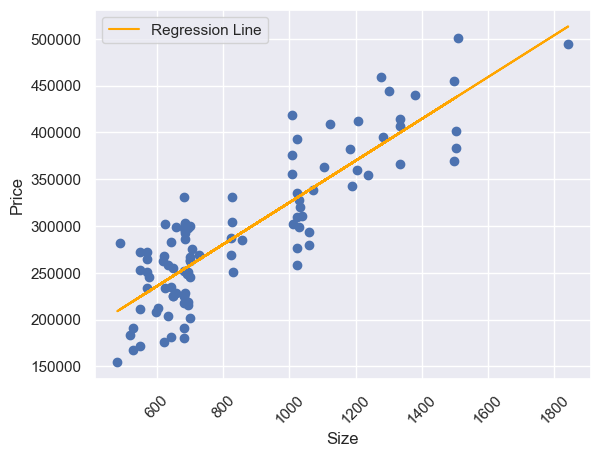

In [99]:
plt.scatter(x1,y)
yhat=reg.intercept_+reg.coef_*x_matrix
plt.plot(x1,yhat,color='orange',label='Regression Line')
plt.xlabel('Size',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.show()